In [1]:
# Name :- Luxshan S.
# Index No:- 190364C

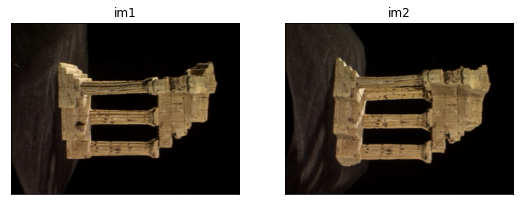

P1= [[ 4.80251845e+01  1.44011271e+03 -5.71648932e+02  7.53293366e+01]
 [ 1.53577034e+03 -6.41434324e+01 -1.63127843e+02  1.85810055e+02]
 [ 4.88387837e-02 -1.81568392e-01 -9.82164799e-01  6.14604846e-01]]
P2= [[-1.55882371e+02  1.44377186e+03 -5.42436214e+02  6.81806220e+01]
 [ 1.34928131e+03 -8.41979541e+01 -7.49443961e+02  1.99929996e+02]
 [-3.40999743e-01 -1.74474039e-01 -9.23730472e-01  6.00850565e-01]]


In [82]:
# Question 01

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f= open('templeSR_par.txt')
assert f is not None
n = int(f.readline())

# Reading the informaiton on the first image
l = f.readline().split()
im1_fn = l[0]
K1 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

# Reading the informaiton on the second image
l = f.readline().split()
im2_fn = l[0]
K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

# Read the two images and show
im1 = cv.imread(r'./templeSparseRing/' + im1_fn ,cv.IMREAD_COLOR)
im2 = cv.imread(r'./templeSparseRing/' + im2_fn ,cv.IMREAD_COLOR)
assert im1 is not None
assert im2 is not None
fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(9,9))
axes[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB), cmap='gray')
axes[0].set_title('im1'),axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB), cmap='gray')
axes[1].set_title('im2'),axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

# Compute P1 and P2
P1 = K1 @ np.hstack((R1, t1)) # P = K*[R/t]
P2 = K2 @ np.hstack ((R2, t2)) # P = K*[R[t]
print('P1=',P1)
print('P2=',P2)

In [83]:
# Computer F
from scipy. linalg import null_space

def skew(x):
    x = x.ravel()
    return np.array([[0, -x[2], x[1]], [x[2], 0, -x[0]], [-x[1], x[0], 0]])

C = null_space(P1)
C = C * np.sign(C[0,0])
e2 = P2 @ C
e2x = skew(e2)
F = e2x @ P2 @ np.linalg.pinv(P1)
print('F=', F)

F= [[-2.87071497e-04 -3.96261289e-02  2.94221686e+02]
 [-3.55039713e-02  1.65329260e-04  1.78860854e+01]
 [-2.76702814e+02  2.12942175e+01 -9.06669374e+03]]


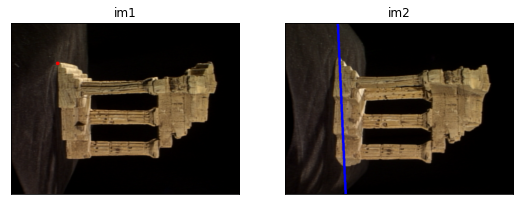

In [84]:
# Compute the epilopar line correspoinding to the given x and plot
x = np.array([130, 115, 1])
cv.circle(im1,(x[0], x[1]), 5, (0, 0, 255), -1)
l2 = F @ x.T
p1= np.array([0, (l2[0]*0 + l2[2])/l2[1]]).astype(int)
p2 = np.array([500, (l2[0]*500 + l2[2])/l2[1]]).astype(int)
cv.line(im2, (p1[0], p1[1]), (p2[0], p2[1]), (255,0,0),5)

fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(9,9))
axes[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB), cmap='gray')
axes[0].set_title('im1'),axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB), cmap='gray')
axes[1].set_title('im2'),axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

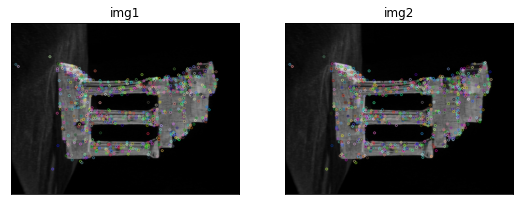

In [85]:
# SIFT

gray= cv.cvtColor(im1,cv.COLOR_RGB2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img1=cv.drawKeypoints(gray,kp,im1)
img2=cv.drawKeypoints(gray,kp,im2)

fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(9,9))
axes[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB), cmap='gray')
axes[0].set_title('img1'),axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB), cmap='gray')
axes[1].set_title('img2'),axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

In [152]:
# Epipolar Lines
pts1 = np.reshape(P1, (6, 2))
pts2 = np.reshape(P2, (6, 2))
pts1 = np.array(pts1)
pts2 = np.array(pts2)
pts1 = pts1.astype(int)
pts2 = pts2.astype(int)
F = np.array(F)
ones = np.ones((6,1))
pts1_final = np.append(pts1, ones, axis=1)
pts2_final = np.append(pts2, ones, axis=1)
lines1 = np.dot(F, pts1_final.transpose())
lines2 = np.dot(pts2_final, F)

In [153]:
def drawlines(img1,lines, pts):
    r,c,_ = img1.shape
    for r, pt1 in zip(lines, pts):
        color=(0,255,255)
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color ,4)
        img1 = cv.circle(img1, tuple(pt1), 5, color, 5)
    return img1

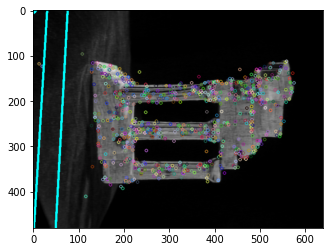

In [158]:
img3 = drawlines(img2, lines1.transpose(), pts2)
plt.imshow(img3)
plt.show()

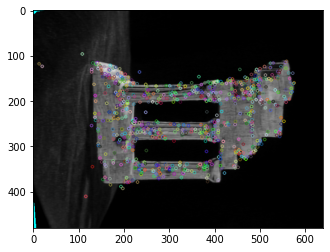

In [159]:
img4 = drawlines(img1, lines2, pts1)
plt.imshow(img4)
plt.show()

In [160]:
u, d, v = np.linalg.svd(F, full_matrices=False)
print("Epipole of first image:", v[2,:])

Epipole of first image: [7.23514742e-02 9.97379189e-01 1.34398816e-04]


In [161]:
u, d, v = np.linalg.svd(F.transpose(), full_matrices=False)
print("Epipole of second image:", v[2,:])

Epipole of second image: [-6.46078588e-02  9.97910722e-01 -1.27975737e-04]
